An Ecommerce company based in New York City sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Lets help them figure it out.

Lets analyze the customer data (it's fake).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

We'll only be using the numerical data of the csv file.

Create a jointplot to compare **the Time on Website** and **Yearly Amount Spent** columns.

/Users/rajkumar/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


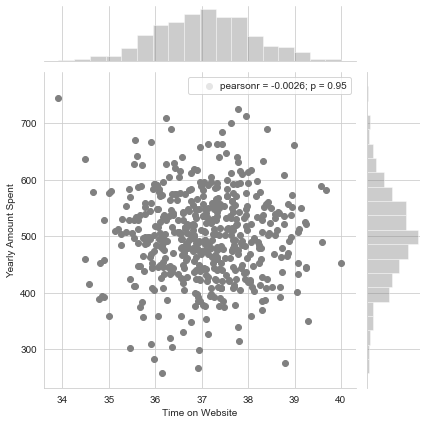

In [6]:
sns.set_style('whitegrid')
from scipy.stats import stats
j=sns.jointplot(customers['Time on Website'],customers['Yearly Amount Spent'],color='grey',height=6)
j.annotate(stats.pearsonr)

Do the same but with **the Time on App** column instead.

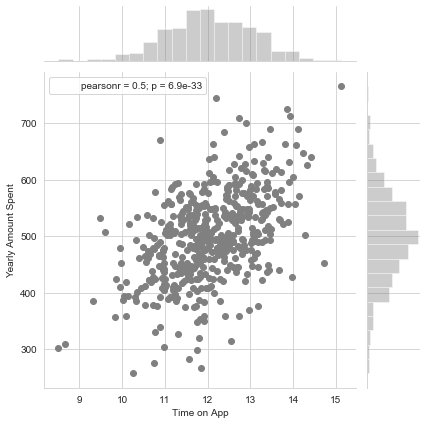

In [7]:
k=sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'],color='gray',height=6)
k.annotate(stats.pearsonr)

Use jointplot to create a 2D hex bin plot comparing **Time on App** and **Length of Membership**

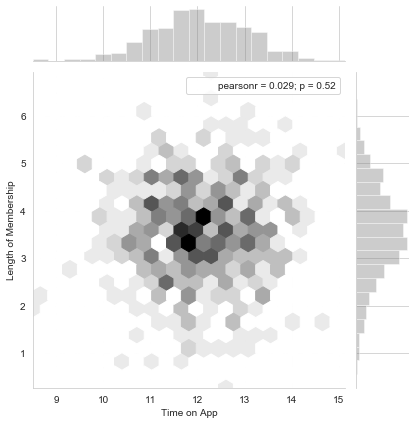

In [8]:
m = sns.jointplot(customers['Time on App'],customers['Length of Membership'],kind='hex',color='grey')
m.annotate(stats.pearsonr)

Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to create the plot below.

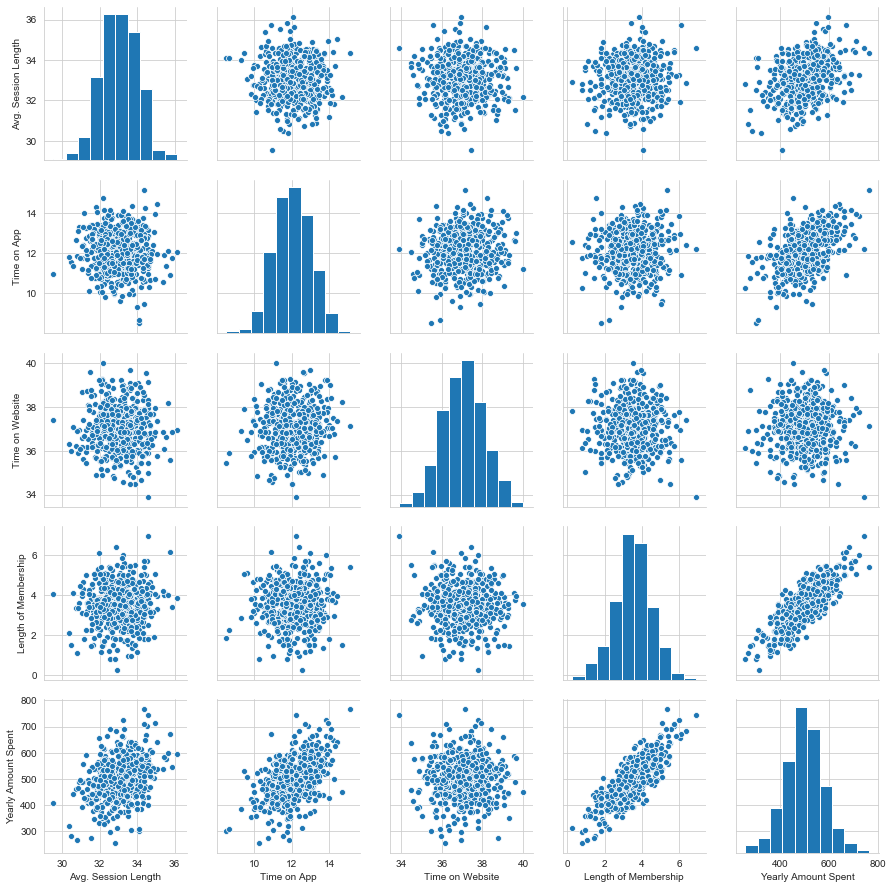

In [9]:
sns.pairplot(customers)

Based on this plot **Length of membership** looks to be the most correlated feature with **Yearly Amount Spent**

Create a linear model plot of **Yearly Amount Spent** vs. **Length of Membership**

/Users/rajkumar/miniconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


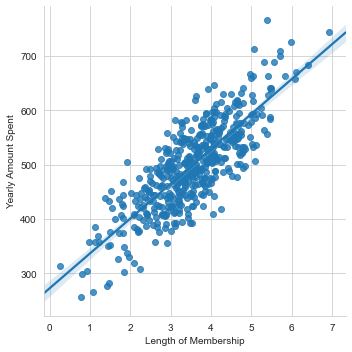

In [10]:
sns.lmplot('Length of Membership','Yearly Amount Spent',data=customers,size=5)

## Splitting Train and Test data

In [11]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [12]:
y= customers['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Training the Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [18]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [19]:
predictions=lm.predict(X_test)

Create a scatterplot of the real test values versus the predicted values.

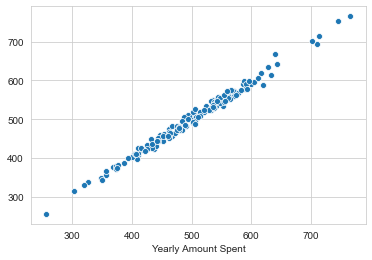

In [20]:
sns.scatterplot(y_test,predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [21]:
from sklearn import metrics

In [22]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test,predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test,predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,predictions))))

MAE: 7.22814865343086
MSE: 79.81305165097483
RMSE: 8.933815066978655


In [23]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

## Residuals

Plot a histogram of the residuals and make sure it looks normally distributed to ensure that everything was okay with the data.

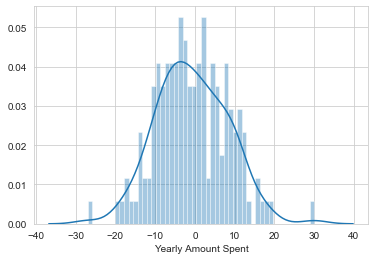

In [24]:
sns.distplot(y_test-predictions,bins=50)

## Conclusion
To conclude, **do we focus our efforts on mobile app or website development?** Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's interpret the coefficients to get an idea.

In [25]:
pd.DataFrame(lm.coef_,pd.Series(['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']),columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an increase of **25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an increase of **38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an increase of **0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an increase of **61.27 total dollars spent**.

**So the company should focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion.